# Import Library 

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data

- Data: Students Performance in Exams

- Nguồn: [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

- Tác giả: Jakki Seshapanpu

- Mô tả: Tập dữ liệu được thu thập nhằm mục đích nghiên cứu mối liên hệ giữa các đặc điểm cá nhân và thành tích học tập của học sinh. Các biến trong tập dữ liệu bao gồm thông tin định tính (giới tính, chủng tộc/dân tộc, trình độ học vấn của phụ huynh, loại bữa ăn và việc tham gia khóa học bổ trợ) và thông tin định lượng (điểm số toán, điểm số đọc và điểm số viết).


Tập dữ liệu có các đặc trưng

- **Gender (Giới tính):** Biến định tính với các giá trị "male" hoặc "female".

- **Race/Ethnicity (Chủng tộc/Dân tộc):** Biến định tính thể hiện nhóm chủng tộc/dân tộc của học sinh (các nhóm A, B, C, D, E).

- **Parental level of education (Trình độ học vấn của phụ huynh):** Biến định tính cho biết mức học vấn của phụ huynh (ví dụ: “some college”, “associate’s degree”, “bachelor’s degree”, “master’s degree”).

- **Lunch (Loại bữa ăn):** Biến định tính xác định loại bữa ăn mà học sinh được hưởng (standard hoặc free/reduced).

- **Test preparation course (Khóa học bổ trợ):** Biến định tính cho biết học sinh có tham gia khóa học ôn tập hay không (none hoặc completed).

- **Math score (Điểm Toán):** Biến số định lượng ghi nhận điểm thi môn Toán của học sinh.

- **Reading score (Điểm Đọc):** Biến số định lượng thể hiện điểm thi môn Đọc, đo lường khả năng đọc hiểu.

- **Writing score (Điểm Viết):** Biến số định lượng cho kết quả thi môn Viết, đánh giá kỹ năng viết lách của học sinh.

In [36]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# EDA

## Tóm tắt thông tin dữ liệu

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [38]:
summary = {
    "Thông tin": [
        "Số lượng bản ghi (dòng)",
        "Số lượng biến (cột)",
        "Số dòng bị trùng lặp hoàn toàn",
        "Tổng số giá trị bị thiếu (missing values)"
    ],
    "Giá trị": [
        len(df),
        df.shape[1],
        df.duplicated().sum(),
        df.isnull().sum().sum()  # Tổng số ô bị missing
    ]
}

summary_df = pd.DataFrame(summary)

print("\nBẢNG TÓM TẮT THÔNG TIN DỮ LIỆU")
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))



BẢNG TÓM TẮT THÔNG TIN DỮ LIỆU
╒═══════════════════════════════════════════╤═══════════╕
│ Thông tin                                 │   Giá trị │
╞═══════════════════════════════════════════╪═══════════╡
│ Số lượng bản ghi (dòng)                   │      1000 │
├───────────────────────────────────────────┼───────────┤
│ Số lượng biến (cột)                       │         8 │
├───────────────────────────────────────────┼───────────┤
│ Số dòng bị trùng lặp hoàn toàn            │         0 │
├───────────────────────────────────────────┼───────────┤
│ Tổng số giá trị bị thiếu (missing values) │         0 │
╘═══════════════════════════════════════════╧═══════════╛


In [39]:
column_info = pd.DataFrame({
    "Tên cột": df.columns,
    "Kiểu dữ liệu": df.dtypes.values,
    "Số giá trị không null": df.notnull().sum().values,
    "Số giá trị null": df.isnull().sum().values,
    "Tỷ lệ thiếu (%)": (df.isnull().sum().values / len(df) * 100).round(2)
})

print("\nBẢNG CHI TIẾT CÁC BIẾN TRONG TẬP DỮ LIỆU")
print(tabulate(column_info, headers='keys', tablefmt='fancy_grid', showindex=False))


BẢNG CHI TIẾT CÁC BIẾN TRONG TẬP DỮ LIỆU
╒═════════════════════════════╤════════════════╤═════════════════════════╤═══════════════════╤═══════════════════╕
│ Tên cột                     │ Kiểu dữ liệu   │   Số giá trị không null │   Số giá trị null │   Tỷ lệ thiếu (%) │
╞═════════════════════════════╪════════════════╪═════════════════════════╪═══════════════════╪═══════════════════╡
│ gender                      │ object         │                    1000 │                 0 │                 0 │
├─────────────────────────────┼────────────────┼─────────────────────────┼───────────────────┼───────────────────┤
│ race/ethnicity              │ object         │                    1000 │                 0 │                 0 │
├─────────────────────────────┼────────────────┼─────────────────────────┼───────────────────┼───────────────────┤
│ parental level of education │ object         │                    1000 │                 0 │                 0 │
├─────────────────────────────┼───────

**Nhận xét:** Từ thu thông tin từ bảng trên ta thấy dữ liệu đã được xử lý tốt từ giai đoạn thu thập, khi không tồn tại các giá trị bị thiếu hay các dòng bị trùng lặp. Nhờ đó, các phân tích thống kê sau này có thể được tiến hành một cách hiệu quả và đáng tin cậy. Điều này giúp đảm bảo rằng mọi kết quả thu được đều phản ánh chính xác mối liên hệ giữa các biến. 

## Xử lý missing và duplicated

### Xử lý missing values

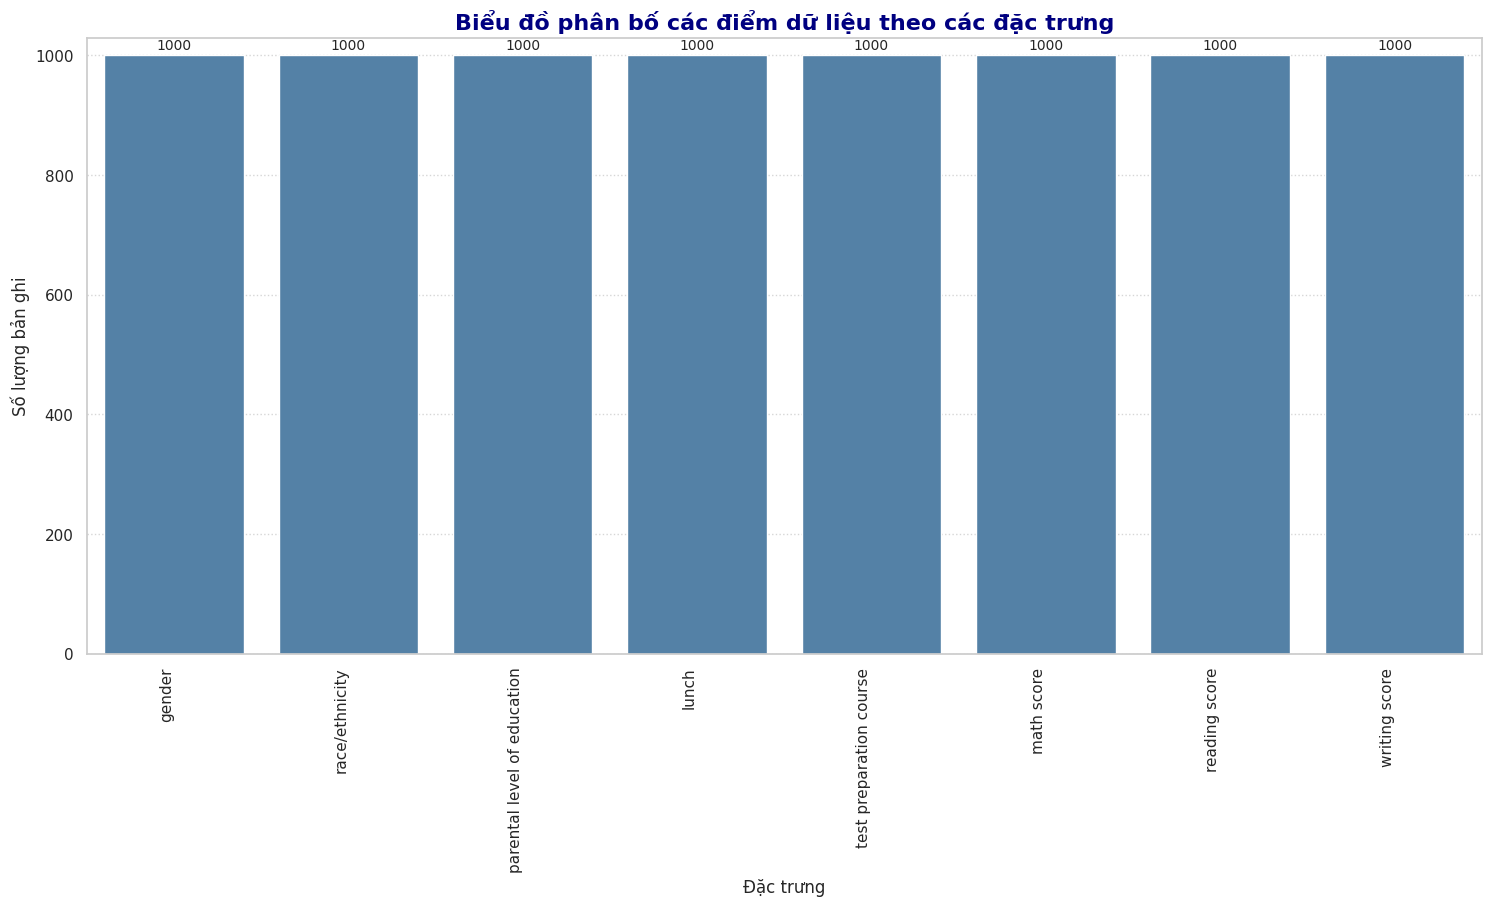

In [40]:
num_of_record = df.shape[0]
non_missing_counts = df.notna().sum()

plt.figure(figsize=(18, 8))
colors = ['steelblue' if value == num_of_record else 'lightskyblue' for value in non_missing_counts.values]

sns.barplot(x=non_missing_counts.index, y=non_missing_counts.values, palette=colors)

for index, value in enumerate(non_missing_counts.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Biểu đồ phân bố các điểm dữ liệu theo các đặc trưng", fontsize=16, weight='bold', color="navy")
plt.xlabel("Đặc trưng", fontsize=12)
plt.ylabel("Số lượng bản ghi", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, df.shape[0] + 30)

plt.grid(axis='y', linestyle=':', alpha=0.8)
plt.show()

- Qua quan sát biểu đồ, nhận thấy tập dữ liệu không xuất hiện giá trị bị thiếu. Tuy nhiên, trong thực tế, việc xuất hiện dữ liệu thiếu là tình huống khá phổ biến và cần được xử lý phù hợp để đảm bảo tính toàn vẹn và độ tin cậy của phân tích.

- Trong trường hợp xuất hiện giá trị thiếu, có thể áp dụng một số phương pháp xử lý phổ biến như sau:

    - **Loại bỏ:** Áp dụng khi tỷ lệ giá trị thiếu nhỏ (thông thường là dưới **5%**) và không ảnh hưởng đáng kể đến kết quả phân tích. 

    - **Thay thế bằng giá trị đặc trưng:** Đối với dữ liệu định lượng, có thể thay thế bằng giá trị mean, median hoặc mode. Đối với dữ liệu định tính, nên thay thế bằng giá trị xuất hiện với tần suất cao nhất.

    - **Nội suy**: Phù hợp với chuỗi thời gian, sử dụng xu hướng dữ liệu để dự đoán giá trị bị thiếu.

    - **Mô hình hóa hoặc học máy:** Sử dụng các mô hình như hồi quy tuyến tính, k-NN hoặc các thuật toán học máy khác để dự đoán và điền giá trị thiếu dựa trên các biến liên quan.

Việc lựa chọn phương pháp xử lý phụ thuộc vào đặc điểm của dữ liệu và mục tiêu phân tích, nhằm đảm bảo tính chính xác và khách quan trong kết quả cuối cùng.

### Xử lý dữ liệu trùng lặp

In [41]:
duplicates = df[df.duplicated()]
print("Số dòng bị trùng lặp hoàn toàn:", duplicates.shape[0])

Số dòng bị trùng lặp hoàn toàn: 0


- Quan sát cho thấy tập dữ liệu hiện tại không có các điểm dữ liệu bị trùng lặp hoàn toàn. Tuy nhiên, trong thực tế, việc xuất hiện các dòng dữ liệu trùng lặp là tình huống phổ biến, đặc biệt khi dữ liệu được tổng hợp từ nhiều nguồn hoặc trong quá trình nhập liệu thủ công. Dữ liệu trùng lặp nếu không được xử lý có thể làm sai lệch kết quả phân tích, gây ra dư thừa hoặc thiên lệch trong thống kê.

- Để xử lý, có thể áp dụng một số phương pháp như sau:

    - **Loại bỏ hoàn toàn các dòng bị trùng lặp:** Đây là cách đơn giản nhất khi dữ liệu trùng là dư thừa và không cần giữ lại.

    - **Giữ lại một bản duy nhất:** Áp dụng khi thông tin các dòng giống nhau hoàn toàn, chỉ cần giữ bản đầu tiên hoặc cuối cùng.

    - **Kiểm tra trùng lặp theo từng cột hoặc nhóm cột:** Trong trường hợp các dòng không giống hoàn toàn nhưng có một số trường bị trùng, cần xác định rõ tiêu chí để làm sạch phù hợp.

Việc phát hiện và xử lý dữ liệu trùng lặp là bước quan trọng trong quá trình tiền xử lý dữ liệu, nhằm đảm bảo độ chính xác và độ tin cậy cho các phân tích sau này

## Phân tích thống kê mô tả

### Dữ liệu định lượng

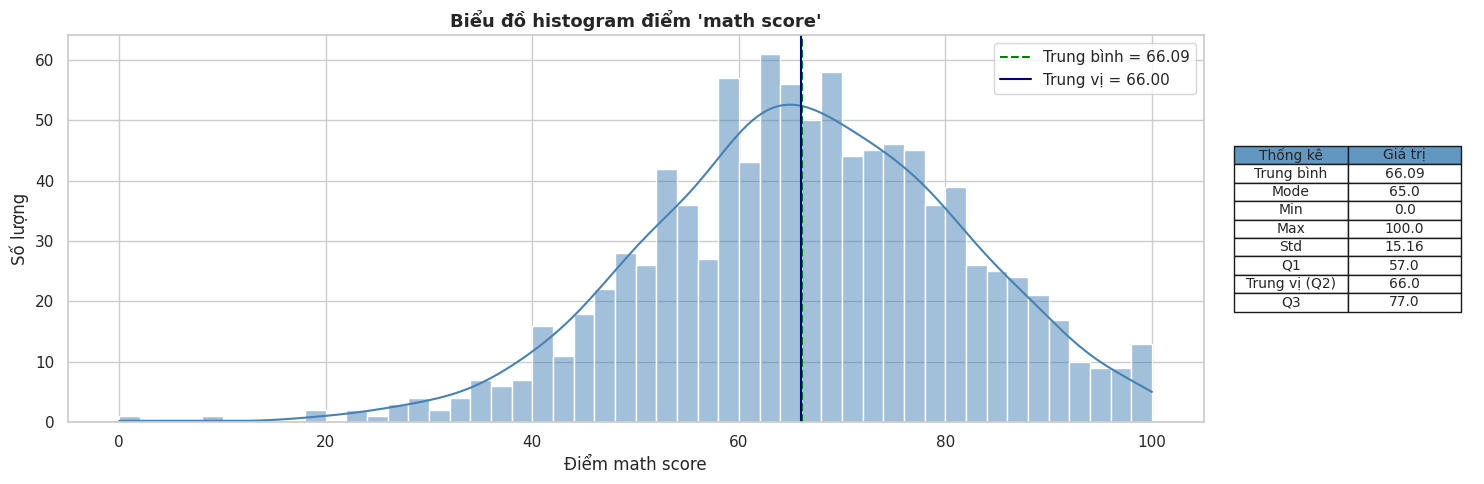

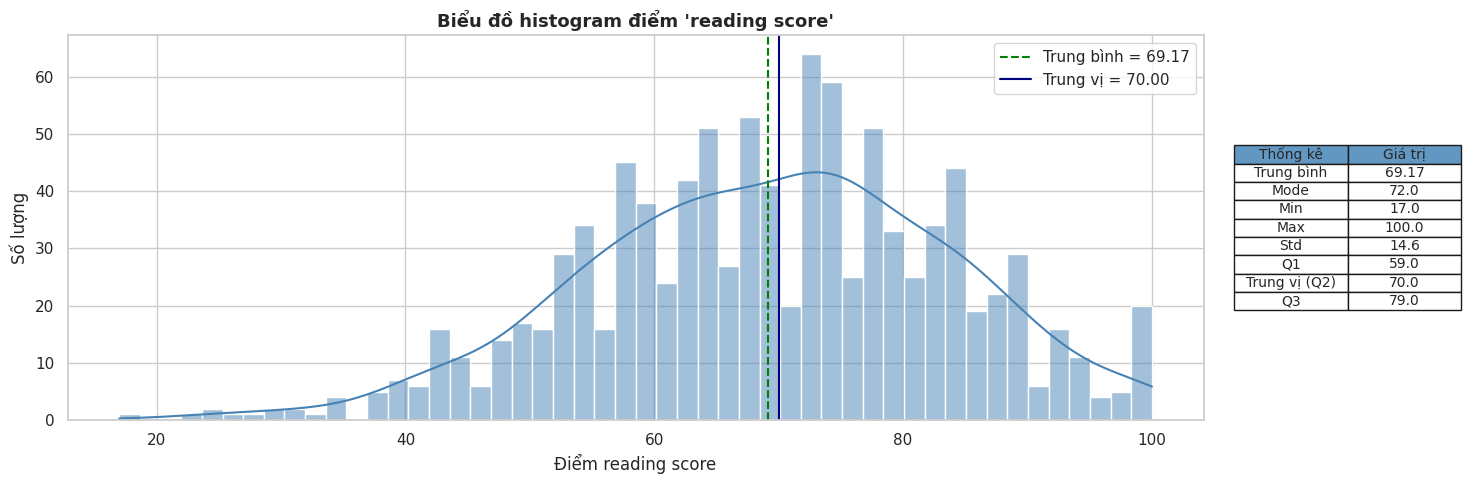

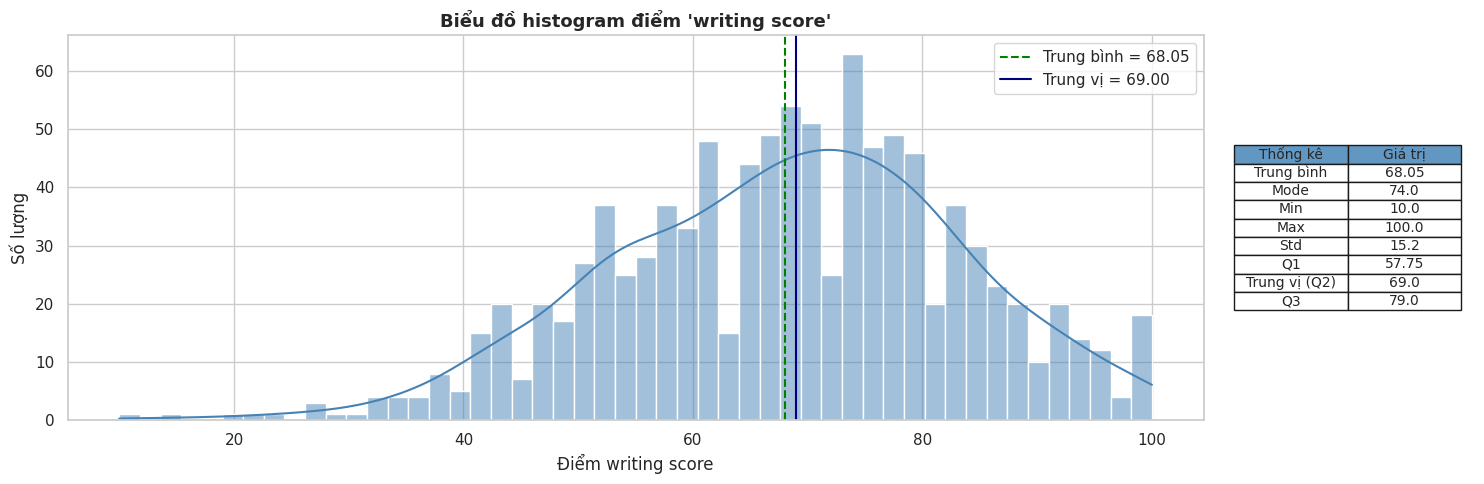

In [43]:
sns.set(style="whitegrid")
scores  = ['math score', 'reading score', 'writing score']

for score in scores :
    data = df[score].dropna()
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().values[0] if not data.mode().empty else None
    min_val = data.min()
    max_val = data.max()
    std_val = data.std()
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    
    stat_table = pd.DataFrame({
        'Thống kê': ['Trung bình','Mode', 'Min', 'Max', 'Std', 'Q1', 'Trung vị (Q2)',  'Q3'],
        'Giá trị': [round(mean_val,2), mode_val, min_val, max_val, round(std_val,2), round(q1,2),round(q2,2), round(q3,2)]
    })

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[9, 2])

    # Histogram
    ax0 = plt.subplot(gs[0])
    sns.histplot(data=df, x=score, bins=50, stat='count', kde=True, color='steelblue', ax=ax0)
    ax0.axvline(mean_val, color='green', linestyle='--', label=f'Trung bình = {mean_val:.2f}')
    ax0.axvline(median_val, color='navy', linestyle='-', label=f'Trung vị = {median_val:.2f}')
    ax0.set_title(f"Biểu đồ histogram điểm '{score}'", fontsize=13, weight='bold')
    ax0.set_xlabel(f"Điểm {score}")
    ax0.set_ylabel("Số lượng")
    ax0.legend()

    # Bảng thống kê
    ax1 = plt.subplot(gs[1])
    ax1.axis('off')
    table_plot = ax1.table(cellText=stat_table.values,
                           colLabels=stat_table.columns,
                           cellLoc='center',
                           loc='center',
                           colColours=["#6297C2", "#6297C2"])
    table_plot.auto_set_font_size(False)
    table_plot.set_fontsize(10)
    table_plot.scale(0.9, 1.1)

    plt.tight_layout()
    plt.show()


**Nhận xét:** Tổng quan quan sát nhanh cho ta thấy, phân bố điểm số của ba môn Toán, Đọc và Viết cho thấy mức độ hiệu suất học tập của học sinh tập trung khá gần với phân bố chuẩn, khi trung bình và trung vị ở các môn đều có giá trị tương đương nhau. Môn Toán có điểm trung bình thấp nhất, trong khi môn Đọc ghi nhận điểm trung bình cao nhất, còn môn Viết nằm giữa nhưng gần với môn Đọc. Mặc dù phần lớn học sinh đạt điểm trong khoảng trung bình đến khá, nhưng tồn tại một số trường hợp ngoại lệ với điểm rất thấp (như 0 ở Toán, 10 ở Viết, 17 ở Đọc) và điểm tối đa đạt 100. Độ lệch chuẩn của cả ba môn đều dao động trong khoảng 14–15, cho thấy mức độ biến động tương đối đồng đều giữa các học sinh. 

**Giải thích lý do sử dụng Histogram:**

- Histogram giúp trực quan hóa mức độ phân bố điểm của học sinh, cho biết điểm số tập trung nhiều ở khoảng nào và mức độ trải rộng của dữ liệu. Khi nhìn vào histogram, ta có thể dễ dàng xác định:
  
    - Có bao nhiêu học sinh đạt điểm cao, trung bình hay thấp.
    - Điểm số có trải rộng đều hay bị tập trung vào một khoảng nhất định.
---
- Histogram giúp nhận diện xu hướng phân bố của điểm thi:

    - Phân phối chuẩn (Normal Distribution): Nếu biểu đồ có dạng đối xứng quanh điểm trung bình.
    - Lệch phải (Right Skewed): Nếu nhiều học sinh đạt điểm thấp.
    - Lệch trái (Left Skewed): Nếu nhiều học sinh đạt điểm cao.
---
- Dễ dàng so sánh:
    - Histogram có thể được sử dụng để so sánh kết quả của các loại điểm số khác nhau nhằm đánh giá sự tiến bộ của học sinh hoặc xem xét ảnh hưởng của thay đổi trong phương pháp giảng dạy.
    - Ví dụ: Trong bài làm, ta có thể nhìn vào histogram và so sánh các cột điểm **math score**, **reading score**, **writting score**.
---
- Trực quan, dễ hiểu và dễ trình bày
    - So với bảng dữ liệu hoặc các dạng biểu đồ khác, histogram giúp người xem nhanh chóng nhận ra xu hướng mà không cần phân tích quá nhiều con số 

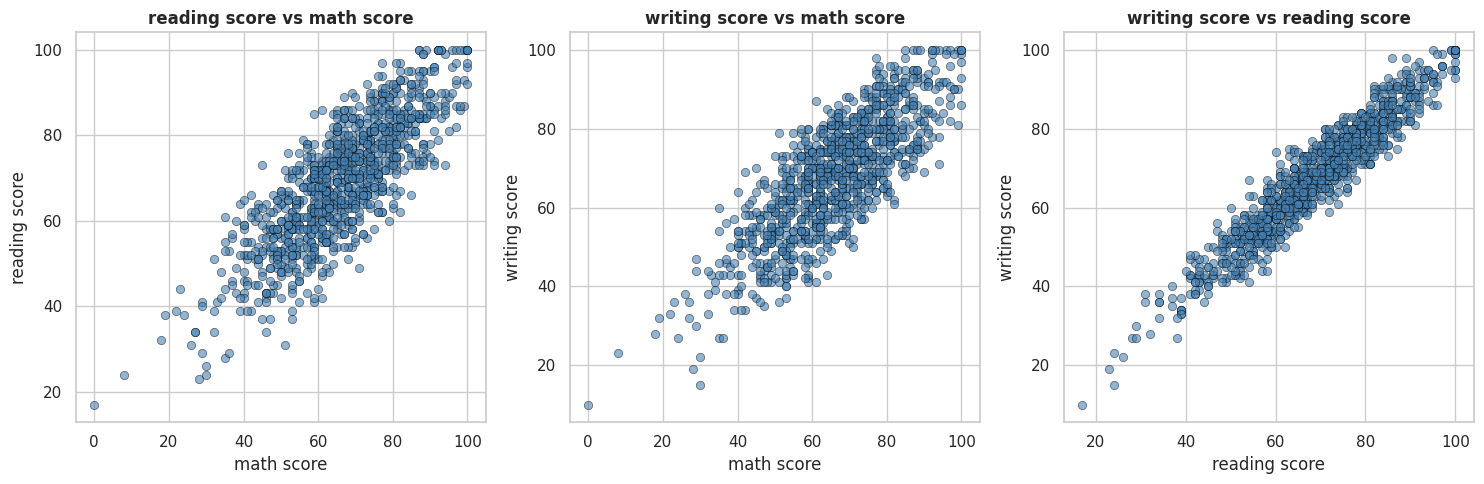

In [44]:
pairs = [('math score', 'reading score'),
         ('math score', 'writing score'),
         ('reading score', 'writing score')]

plt.figure(figsize=(15, 5))

for i, (x_var, y_var) in enumerate(pairs):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=x_var, y=y_var, color='steelblue', edgecolor='black', alpha=0.6)
    plt.title(f"{y_var} vs {x_var}", fontsize=12, weight='bold')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()

**Nhận xét:** Nhìn chung, cả ba biểu đồ tán xạ đều cho thấy mối quan hệ tương đối chặt chẽ và có xu hướng tuyến tính tăng dần giữa các cặp điểm (Toán - Đọc), (Toán - Viết) và (Đọc - Viết). Nhóm học sinh có điểm Toán cao thường đồng thời có điểm Đọc và Viết ở mức cao. Đặc biệt, mối tương quan giữa Đọc và Viết dường như mạnh hơn so với Toán, phản ánh tính tương đồng trong kỹ năng ngôn ngữ. Mặc dù vẫn có một số trường hợp nằm rải rác ở các vùng điểm thấp hoặc rất cao, phần lớn dữ liệu tập trung dọc theo đường xu hướng, khẳng định sự tương quan dương khá rõ rệt giữa các môn. 

**Giải thích lý do sử dụng Scatter plot**

- Dễ dàng biểu diễn mối quan hệ giữa hai biến số (tương quan): Scatter plot cho phép trực quan hóa mối quan hệ giữa hai biến số định lượng. Mỗi học sinh được biểu diễn bằng một điểm trên mặt phẳng tọa độ, từ đó có thể dễ dàng nhận thấy xu hướng chung:
    - Nếu các điểm phân bố theo chiều đi lên: tương quan dương (khi điểm môn này tăng thì môn kia cũng tăng).
    - Nếu các điểm đi xuống: tương quan âm.
    - Nếu các điểm rải rác không theo quy luật: có thể không có tương quan rõ ràng.
    - Điều này giúp đánh giá xem học sinh có xu hướng học tốt đồng đều các môn hay không.
---
- Giúp phát hiện các outlier: Scatter plot giúp phát hiện những học sinh có kết quả đặc biệt khác biệt so với phần lớn còn lại. Ví dụ, một học sinh đạt điểm rất cao ở **math score** nhưng lại thấp bất thường ở **writting score** có thể là một outlier. Những điểm nằm tách biệt khỏi nhóm còn lại trên đồ thị có thể phản ánh vấn đề trong việc học tập hoặc cần được hỗ trợ riêng.

### Dữ liệu định tính

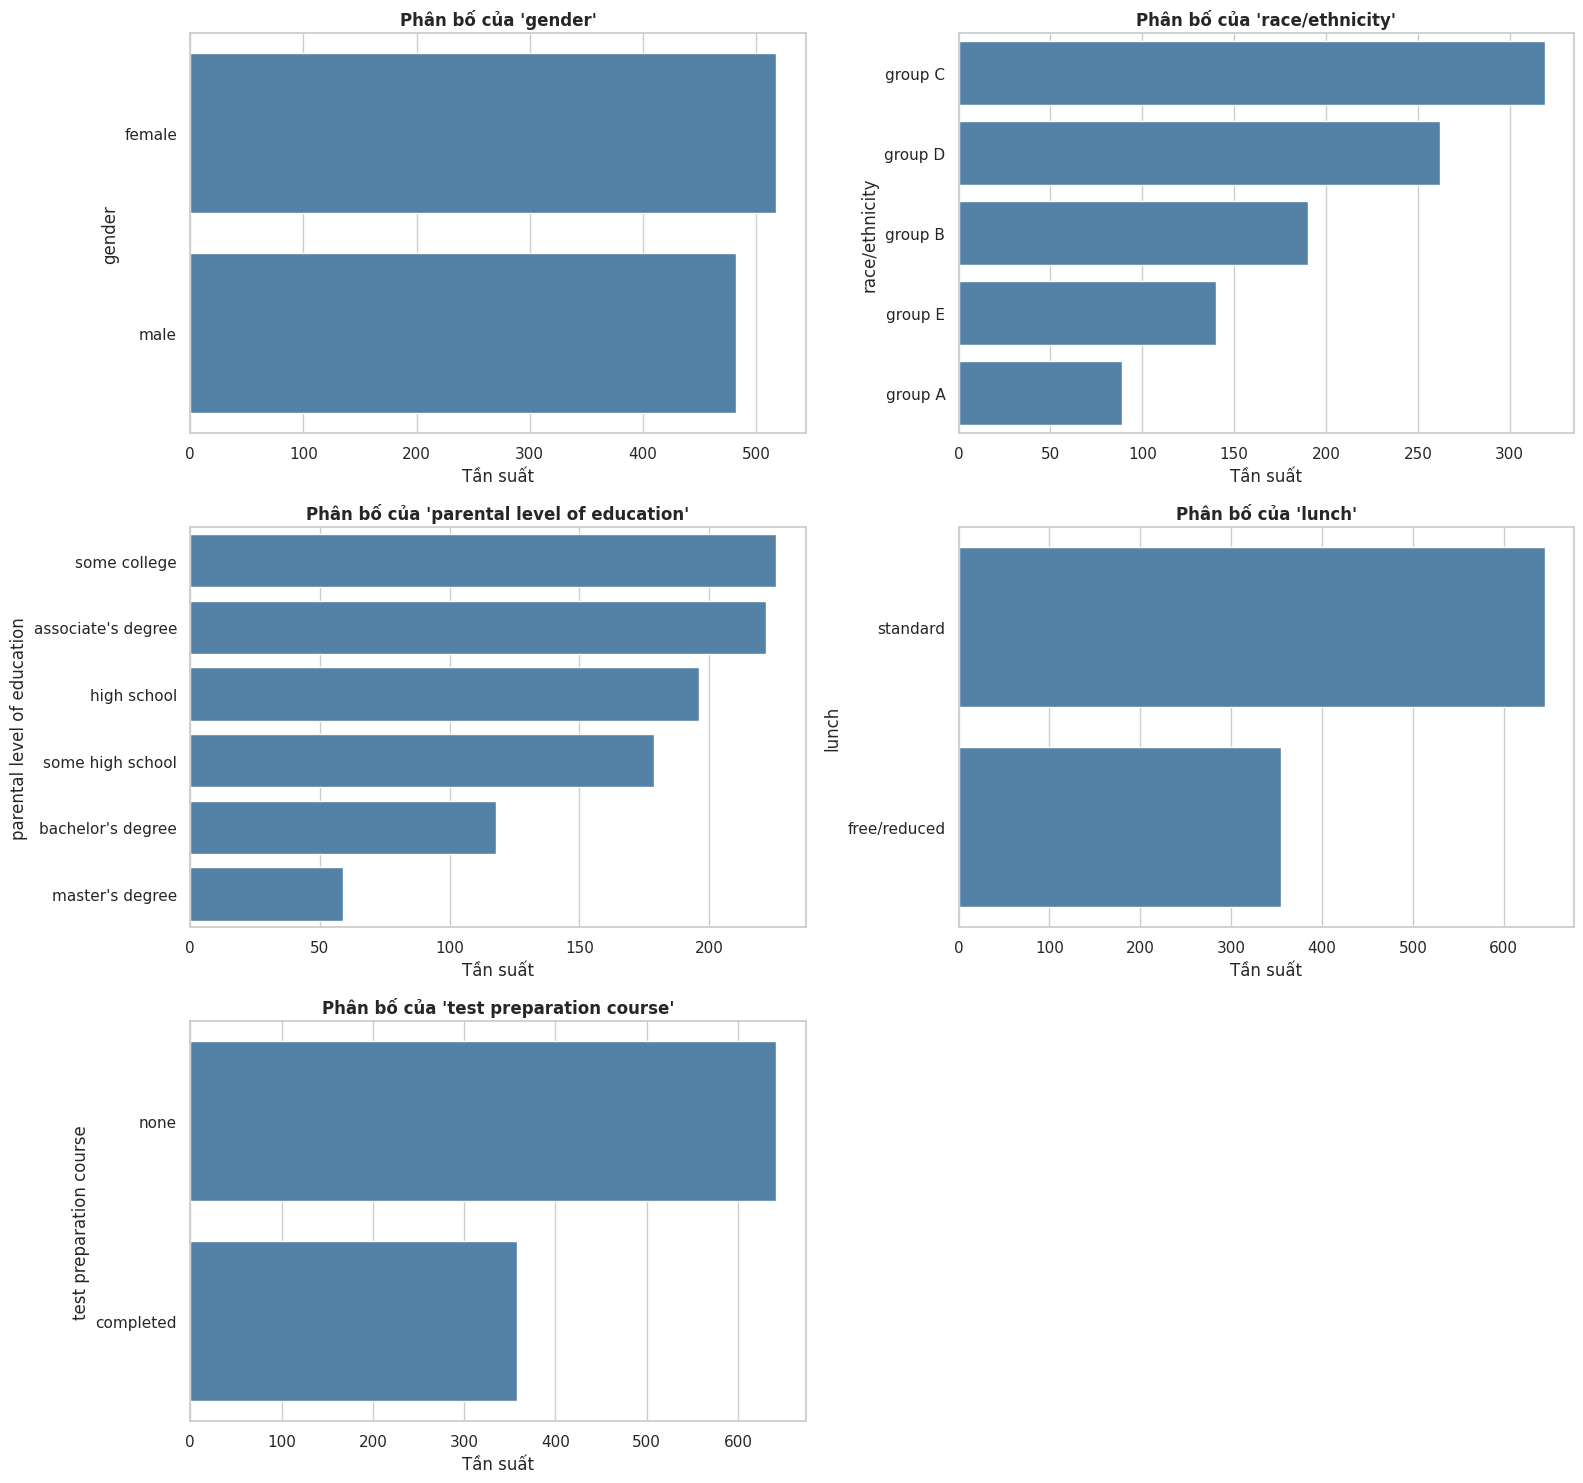

In [45]:
sns.set(style="whitegrid")

cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


n = len(cat_columns)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(16, rows * 5))

for i, attribute in enumerate(cat_columns):
    plt.subplot(rows, cols, i + 1)
    order = df[attribute].value_counts().index
    sns.countplot(data=df, y=attribute, order=order, color='steelblue')

    plt.title(f"Phân bố của '{attribute}'", fontsize=12, weight='bold')
    plt.xlabel("Tần suất")
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

**Nhận xét:** Biểu đồ cột cho thấy sự phân bố khá đồng đều về giới tính, với số lượng học sinh nam và nữ tương đương nhau. Nhóm race/ethnicity chủ yếu tập trung ở nhóm C và D, cho thấy mặc dù có sự đa dạng về sắc tộc, nhưng phần lớn học sinh thuộc hai nhóm này. Phần lớn phụ huynh có trình độ học vấn từ “some college” đến “associate’s degree”, phản ánh mức độ giáo dục trung bình khá phổ biến. Hơn nữa, đa số học sinh sử dụng bữa ăn tiêu chuẩn, mặc dù vẫn có một tỷ lệ đáng kể hưởng chế độ miễn/giảm, cho thấy sự khác biệt về điều kiện kinh tế giữa các học sinh. Cuối cùng, hầu hết học sinh không tham gia khóa học bổ trợ, điều này có thể là yếu tố cần quan tâm trong việc cải thiện kết quả học tập của một số nhóm học sinh.

**Giải thích lý do sử dụng countplot**

- Hiển thị rõ ràng phân bố của các biến phân loại: giúp biểu diễn số lượng (tần suất) của từng nhóm trong một biến phân loại, chẳng hạn như giới tính, trình độ học vấn của cha mẹ, nhóm chủng tộc,...Mỗi cột trong biểu đồ đại diện cho một nhóm giá trị, chiều dài cột thể hiện bao nhiêu học sinh thuộc nhóm đó. Điều này giúp người xem nhanh chóng nắm được cấu trúc phân bố của dữ liệu.
---
- Phát hiện các điểm bất thường, thiên lệch: thông qua Countplot, ta có thể phát hiện mức độ mất cân bằng giữa các nhóm:
    - Ví dụ: Một lớp có quá nhiều học sinh nam so với nữ hoặc phần lớn học sinh có cha mẹ học đại học trở lên, số còn lại rất ít.
    - Việc nhận ra những thiên lệch này rất quan trọng, vì chúng có thể ảnh hưởng đến kết quả phân tích sau này. Countplot giúp phát hiện sớm các vấn đề này để điều chỉnh, xử lý hoăc đưa ra cách phân tích dữ liệu cho phù hợp.

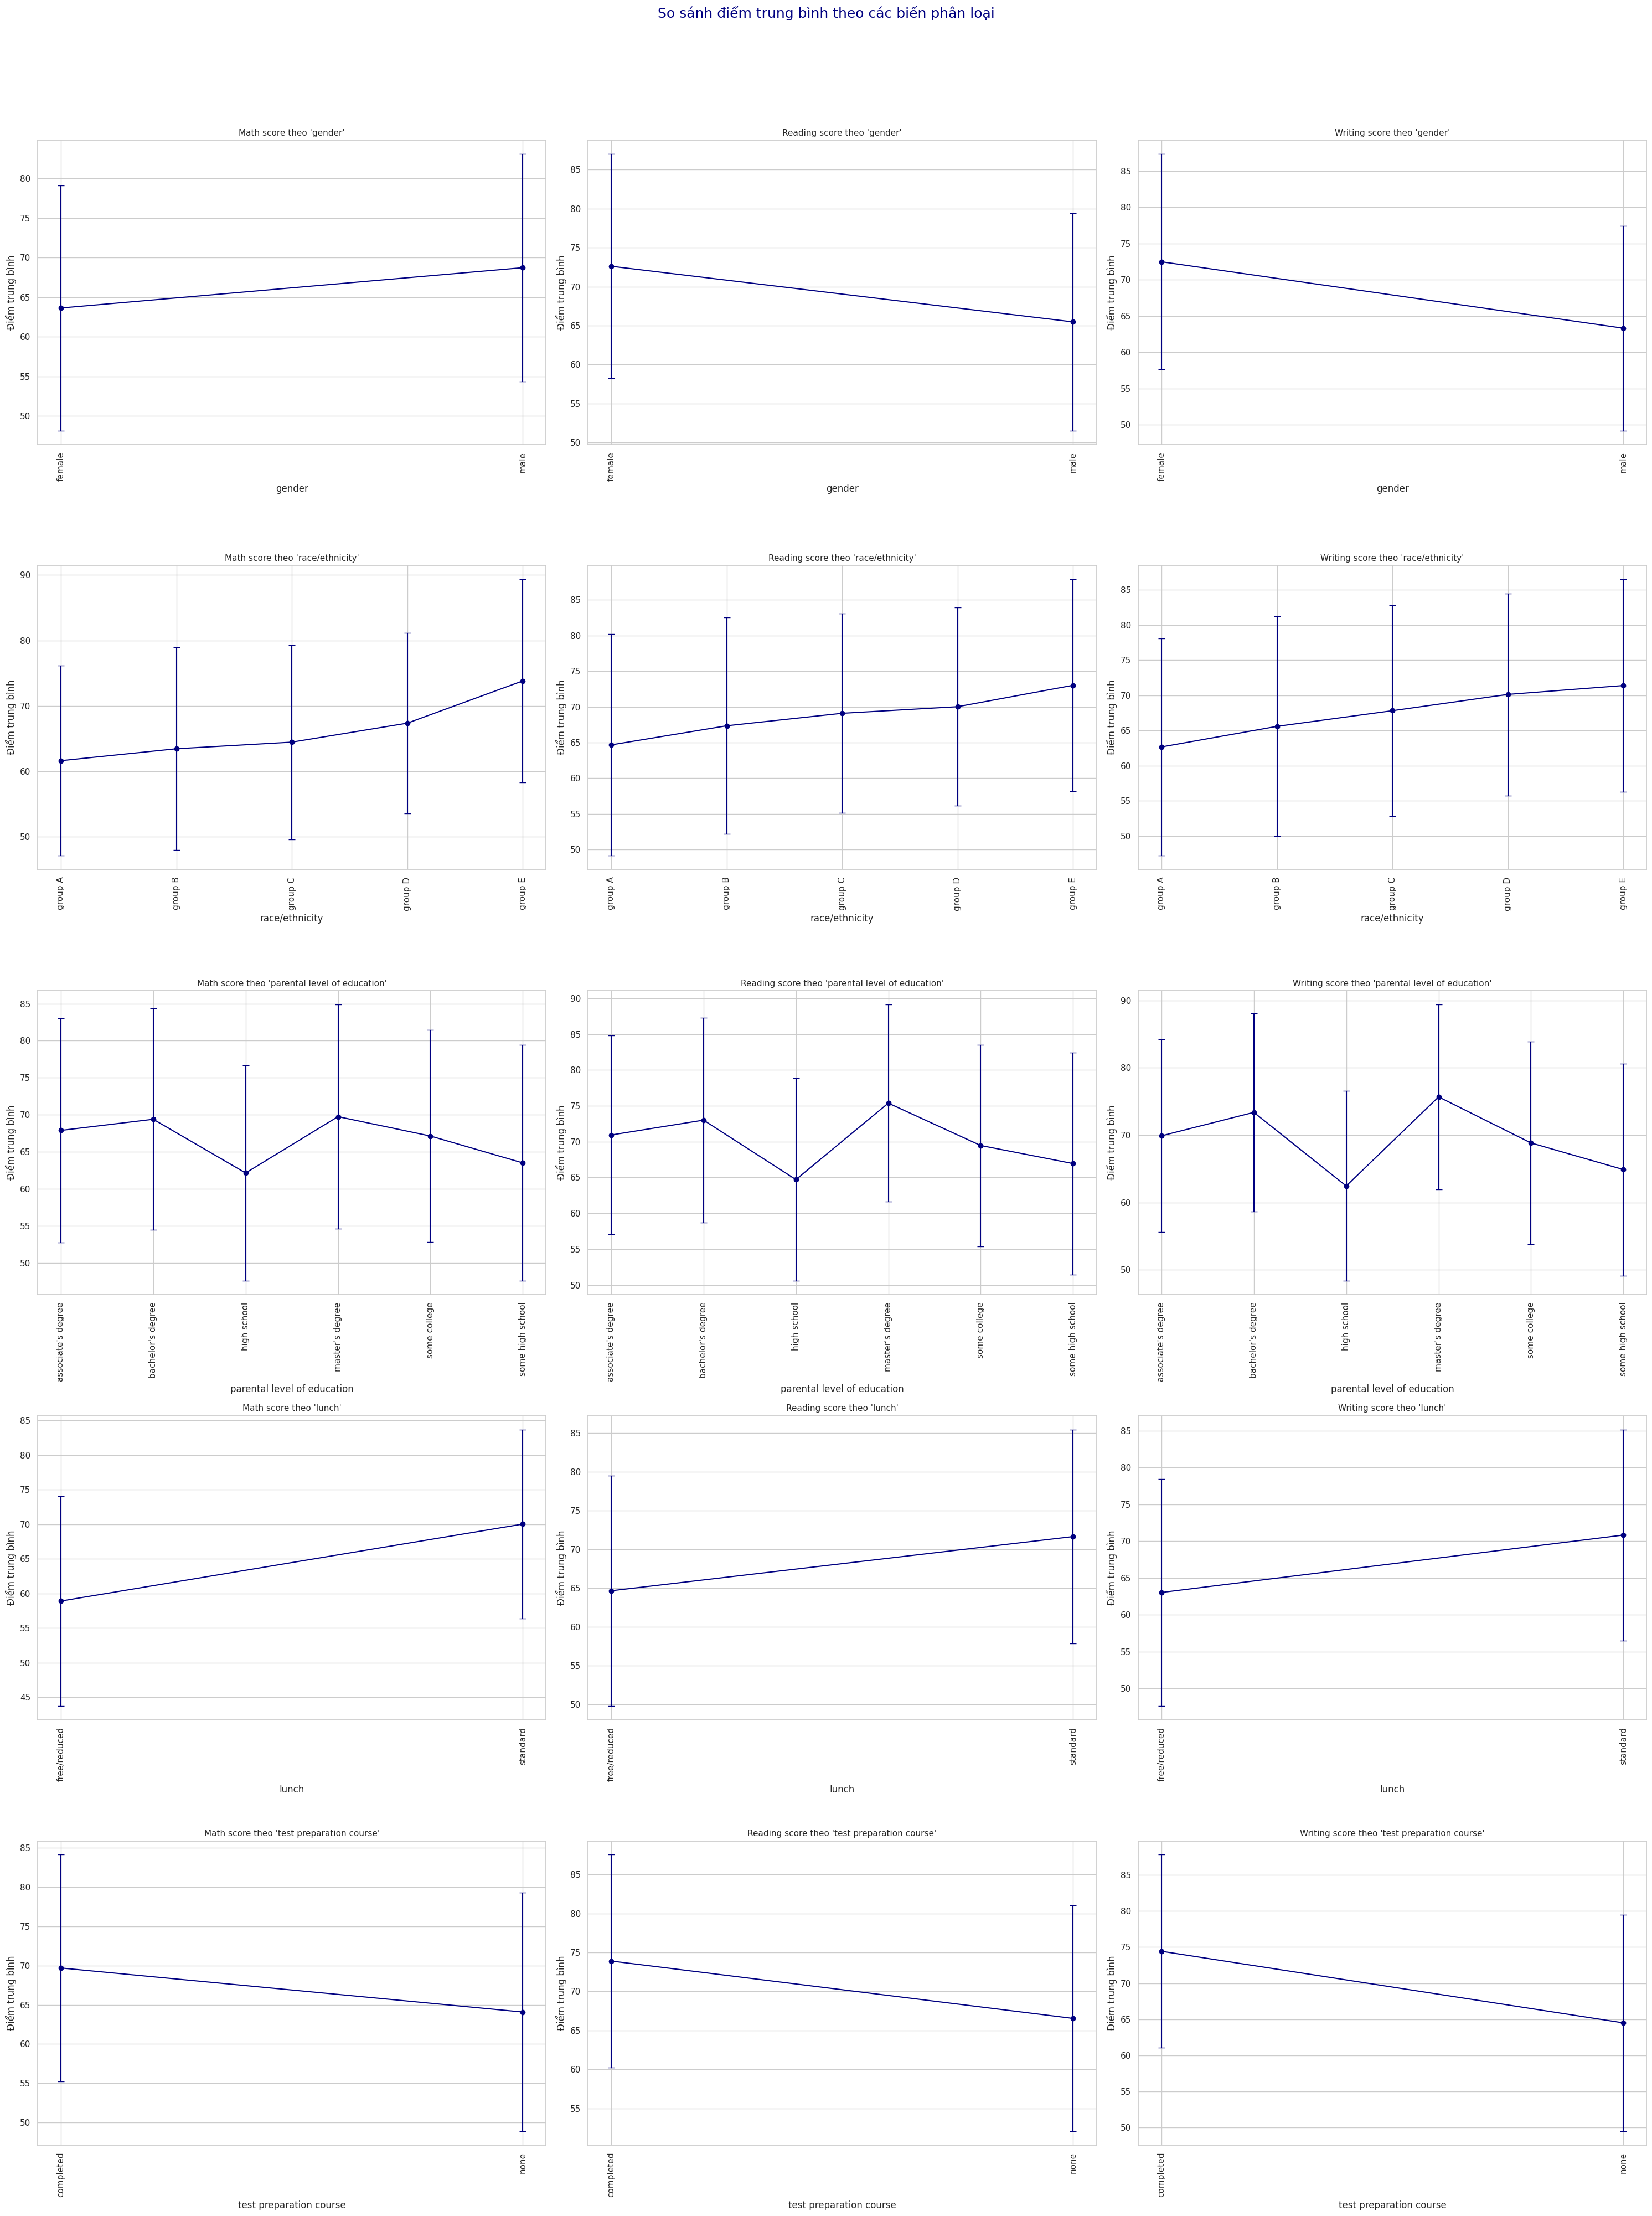

In [46]:
sns.set(style="whitegrid")

cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_columns = [col for col in cat_columns if col not in ['final_grade']]
scores = ['math score', 'reading score', 'writing score']
rows = len(cat_columns)
cols = 3

fig = plt.figure(figsize=(cols * 10, rows * 8))

for i, cat_var in enumerate(cat_columns):
    mean_std_df = df.groupby(cat_var)[scores].agg(['mean', 'std'])
    x_labels = mean_std_df.index.tolist()
    x = range(len(x_labels))
    for j, subject in enumerate(scores):
        idx = i * cols + j + 1
        ax = fig.add_subplot(rows, cols, idx)
        ax.errorbar(
            x,
            mean_std_df[(subject, 'mean')],
            yerr=mean_std_df[(subject, 'std')],
            fmt='-o',
            capsize=4,
            color='navy'
        )
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=90)
        ax.set_xlabel(cat_var)
        ax.set_ylabel("Điểm trung bình")
        ax.set_title(f"{subject.capitalize()} theo '{cat_var}'", fontsize=11)



fig.suptitle("So sánh điểm trung bình theo các biến phân loại", fontsize=18, color='navy', y=1.02)
plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.show()


**Nhận xét**: Dựa trên các biểu đồ so sánh điểm trung bình theo nhóm phân loại, có thể nhận xét rằng học sinh nữ thường có điểm Đọc và Viết cao hơn so với học sinh nam, trong khi điểm Toán có thể khá tương đồng hoặc thậm chí học sinh nam có lợi thế nhẹ. Các nhóm thuộc race/ethnicity cho thấy sự khác biệt đáng kể, với các nhóm như D và E đạt điểm trung bình cao hơn so với các nhóm A, B, C. Điểm số của học sinh cũng tăng dần theo trình độ học vấn của phụ huynh, khi mà nhóm có bằng cử nhân hoặc thạc sĩ thường gắn liền với kết quả học tập tốt hơn. Bên cạnh đó, học sinh sử dụng bữa ăn tiêu chuẩn có xu hướng đạt điểm cao hơn so với nhóm hưởng chế độ miễn/giảm, cho thấy mối liên hệ giữa điều kiện kinh tế và thành tích học tập. Cuối cùng, việc hoàn thành khóa học bổ trợ cũng đóng góp tích cực, khi học sinh tham gia khóa học thường có điểm số vượt trội hơn so với những học sinh không tham gia.

**Giải thích lý do sử dụng biểu đồ đường kết hợp sai số (errorbar plot)**

- Biểu diễn mối quan hệ giữa các biến số định tính và định lượng:
    - Biểu đồ đường kết hợp sai số (errorbar plot) là một công cụ trực quan giúp thể hiện mối liên hệ giữa biến phân loại (định tính) như giới tính, loại bữa ăn, trình độ học vấn của cha mẹ,... và biến số định lượng là điểm số các môn học.
    - Bằng cách nhóm dữ liệu theo từng giá trị của biến phân loại, biểu đồ cho thấy điểm trung bình của từng nhóm, qua đó giúp đánh giá mức độ ảnh hưởng của các yếu tố xã hội hoặc học tập đến kết quả học tập của học sinh.
--- 
- Thể hiện được ý nghĩa của từng giá trị trong mỗi biến định tính: Biểu đồ không chỉ thể hiện điểm trung bình của mỗi nhóm mà còn đi kèm thanh sai số (standard deviation) – cho biết mức độ biến động của điểm trong từng nhóm.
    - Nếu thanh sai số ngắn: nhóm học sinh có kết quả học tập đồng đều, ổn định.
    - Nếu thanh sai số dài: điểm số trong nhóm phân tán nhiều, có sự chênh lệch lớn.
    - Điều này giúp đánh giá không chỉ mức độ học tốt, mà còn cho thấy tính nhất quán trong kết quả học tập của từng nhóm.

## Phát hiện dữ liệu ngoại lai

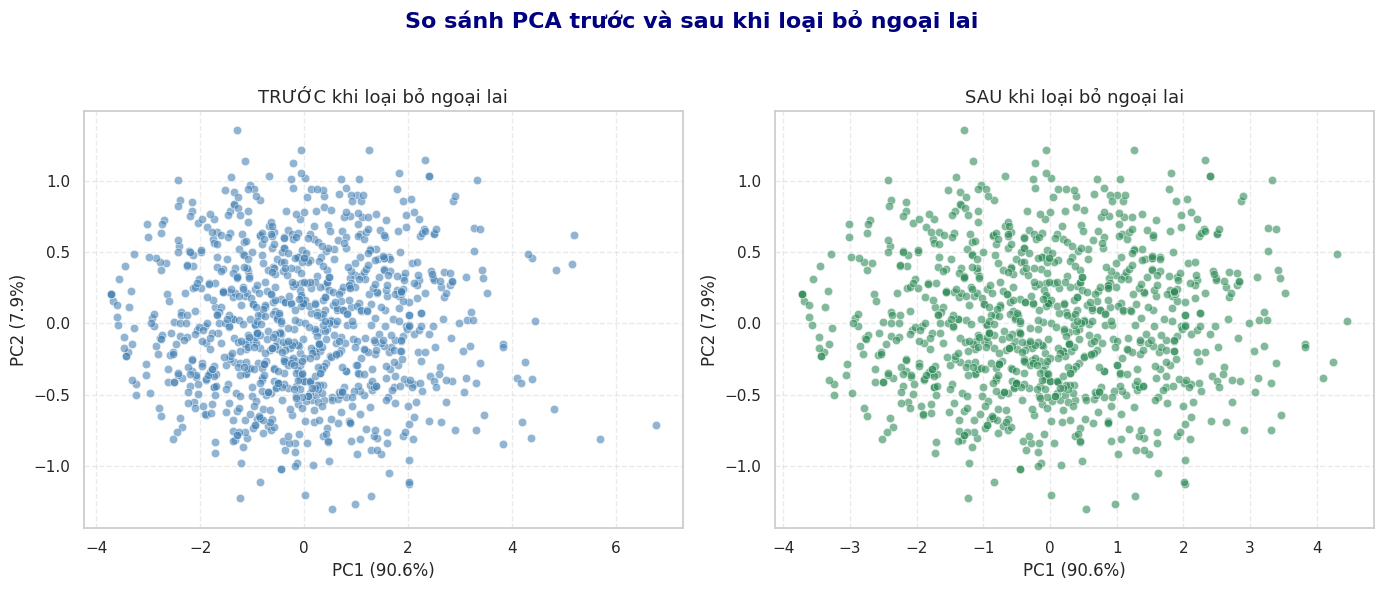

In [47]:
num_df = df.select_dtypes(include='number').dropna()

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

non_outliers_mask = ~((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=1)

df_before = df.dropna()                         
df_after = df[non_outliers_mask].dropna()     

num_columns = num_df.columns.tolist()

scaler = StandardScaler()
scaled_before = scaler.fit_transform(df_before[num_columns])   
scaled_after = scaler.transform(df_after[num_columns])      

pca = PCA(n_components=2)
pca_before = pca.fit_transform(scaled_before)
pca_after = pca.transform(scaled_after)


pc1_var = pca.explained_variance_ratio_[0] * 100
pc2_var = pca.explained_variance_ratio_[1] * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_before[:, 0], y=pca_before[:, 1], color='steelblue', alpha=0.6)
plt.title("TRƯỚC khi loại bỏ ngoại lai", fontsize=13)
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_after[:, 0], y=pca_after[:, 1], color='seagreen', alpha=0.6)
plt.title("SAU khi loại bỏ ngoại lai", fontsize=13)
plt.xlabel(f"PC1 ({pc1_var:.1f}%)")
plt.ylabel(f"PC2 ({pc2_var:.1f}%)")
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle("So sánh PCA trước và sau khi loại bỏ ngoại lai", fontsize=16, weight='bold', color='navy')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Nhận xét:** Sau khi loại bỏ ngoại lai bằng phương pháp IQR, phân bố dữ liệu trên hai thành phần chính (PC1, PC2) trở nên gọn gàng và ít phân tán hơn. Ở biểu đồ trước khi loại bỏ ngoại lai, có thể thấy nhiều điểm nằm rải rác ở vùng xa tâm cụm chính, biểu hiện cho các giá trị ngoại lai. Sau khi lọc, số lượng điểm cực đoan giảm đáng kể, dữ liệu tập trung thành cụm chặt chẽ hơn. Điều này giúp việc phân tích trở nên rõ ràng, tránh ảnh hưởng của những giá trị bất thường lên các mô hình thống kê hoặc máy học sau này. 

Trong quá trình phân tích, chúng tôi phân biệt rõ giữa hai mục tiêu: khám phá dữ liệu (EDA) và xây dựng mô hình dự đoán. Cụ thể, ở bước khám phá insight, chúng tôi giữ lại các giá trị ngoại lai để phản ánh đúng phân bố tự nhiên và phát hiện các trường hợp đặc biệt trong dữ liệu. Ngược lại, khi xây dựng mô hình, chúng tôi loại bỏ outlier dựa trên các biến định lượng nhằm tăng tính ổn định, độ chính xác và giảm nhiễu cho mô hình học máy.

In [48]:
summary = {
    "Thông tin": [
        "Số lượng bản ghi (dòng)",
        "Số lượng biến (cột)",
        "Số dòng bị trùng lặp hoàn toàn",
        "Tổng số giá trị bị thiếu (missing values)"
    ],
    "Giá trị": [
        len(df_after),
        df_after.shape[1],
        df_after.duplicated().sum(),
        df_after.isnull().sum().sum()  
    ]
}

summary_df = pd.DataFrame(summary)

print("\nBẢNG TÓM TẮT THÔNG TIN DỮ LIỆU")
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))



BẢNG TÓM TẮT THÔNG TIN DỮ LIỆU
╒═══════════════════════════════════════════╤═══════════╕
│ Thông tin                                 │   Giá trị │
╞═══════════════════════════════════════════╪═══════════╡
│ Số lượng bản ghi (dòng)                   │       988 │
├───────────────────────────────────────────┼───────────┤
│ Số lượng biến (cột)                       │         8 │
├───────────────────────────────────────────┼───────────┤
│ Số dòng bị trùng lặp hoàn toàn            │         0 │
├───────────────────────────────────────────┼───────────┤
│ Tổng số giá trị bị thiếu (missing values) │         0 │
╘═══════════════════════════════════════════╧═══════════╛


# Phân tích phân phối xác suất

In [49]:
math_scores = df["math score"]
reading_scores = df["reading score"]
writing_scores = df["writing score"]

In [50]:
def check_normality(data, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.histplot(data, kde=True, bins=5, color="steelblue", ax=axes[0])
    axes[0].set_title(f"Histogram & KDE của {title}")
    axes[0].set_xlabel(title)
    axes[0].set_ylabel("Tần suất")

    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot của {title}")
    
    plt.tight_layout()
    plt.show()

    shapiro_test = stats.shapiro(data)
    print(f"Shapiro-Wilk test cho {title}: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.5f}")


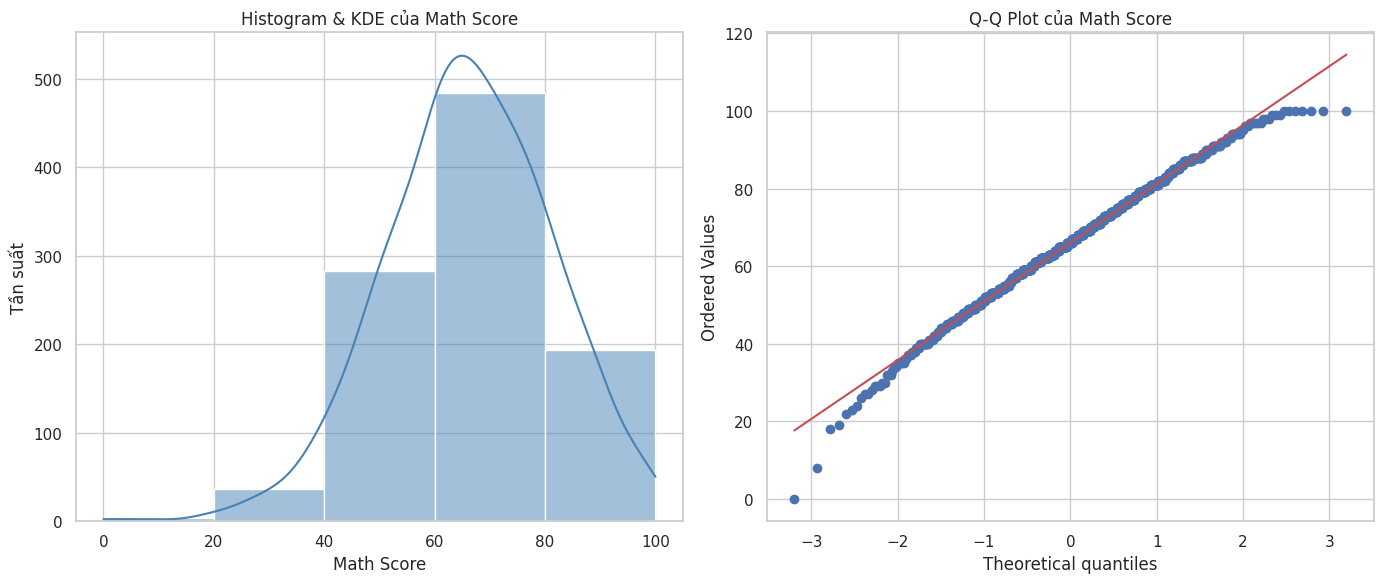

Shapiro-Wilk test cho Math Score: Statistic=0.9932, p-value=0.00015


In [51]:
check_normality(math_scores, "Math Score")

**Nhận xét:** Dựa trên kết quả kiểm định Shapiro-Wilk, với thống kê = 0.9932 và p-value = 0.00015 (< 0.05), chúng ta bác bỏ giả thuyết H0, từ đó khẳng định rằng điểm Toán không tuân theo phân phối chuẩn. Qua biểu đồ histogram và đường KDE, thấy rằng phân bố điểm Toán chủ yếu tập trung quanh mức trung bình (~70) nhưng không hoàn toàn đối xứng, với xu hướng lệch trái (đuôi bên trái dài hơn) do có một số điểm rất thấp (dưới 30) và một số điểm rất cao (trên 90) làm méo dạng phân bố chung. Q-Q Plot cũng cho thấy dữ liệu lệch khỏi đường chuẩn 45° chứng minh thêm sự không chuẩn của phân phối. Như vậy, mặc dù phần lớn học sinh đạt điểm trong khoảng trung bình đến khá (60-80), nhưng sự tồn tại của các giá trị ngoại lai làm cho phân phối bị lệch trái. 

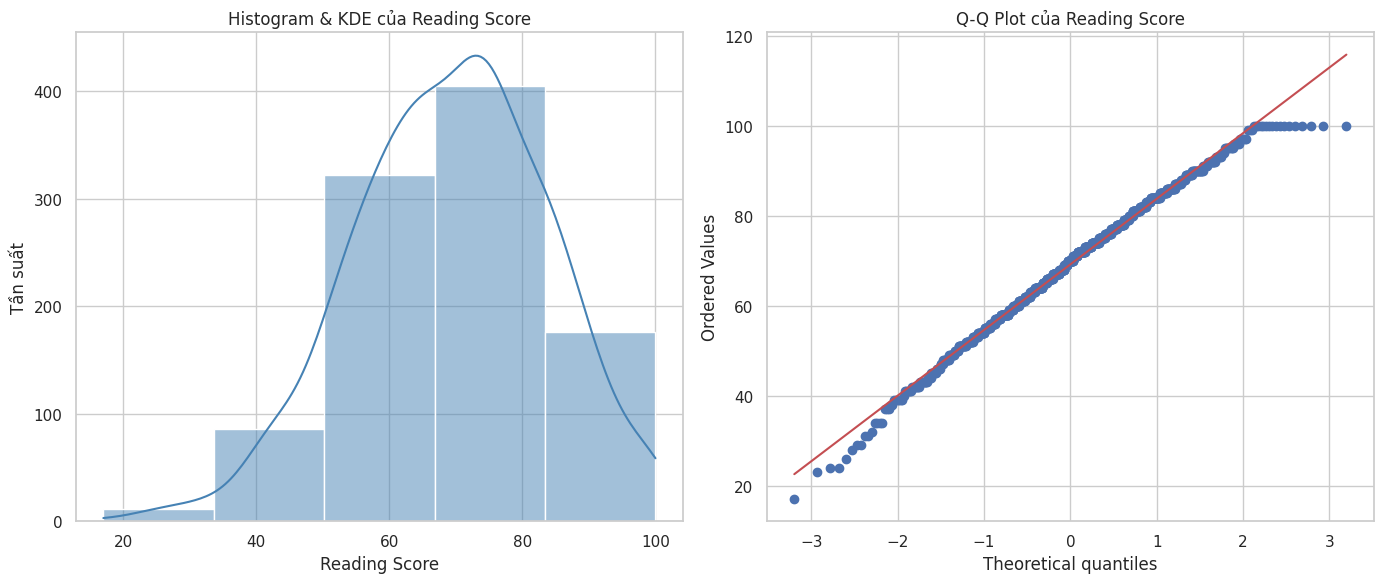

Shapiro-Wilk test cho Reading Score: Statistic=0.9929, p-value=0.00011


In [52]:
check_normality(reading_scores, "Reading Score")

**Nhận xét:** Kết quả kiểm định Shapiro-Wilk cho điểm Đọc cho thấy Statistic = 0.9929 và p-value = 0.00011, nhỏ hơn mức ý nghĩa 0.05, dẫn đến việc bác bỏ giả thuyết H0 và khẳng định rằng dữ liệu không tuân theo phân phối chuẩn. Qua biểu đồ Histogram và KDE, nhận thấy phân bố điểm Đọc có xu hướng lệch trái nhẹ, với phần đuôi bên trái kéo dài, mặc dù phần lớn học sinh đạt điểm tập trung ở khoảng 70-80, biểu hiện thành tích ổn định. Q-Q Plot cũng cho thấy dữ liệu không hoàn toàn khớp với đường chuẩn 45°, đặc biệt là phần đuôi bên trái bị lệch xuống, xác nhận xu hướng lệch trái nhẹ. 

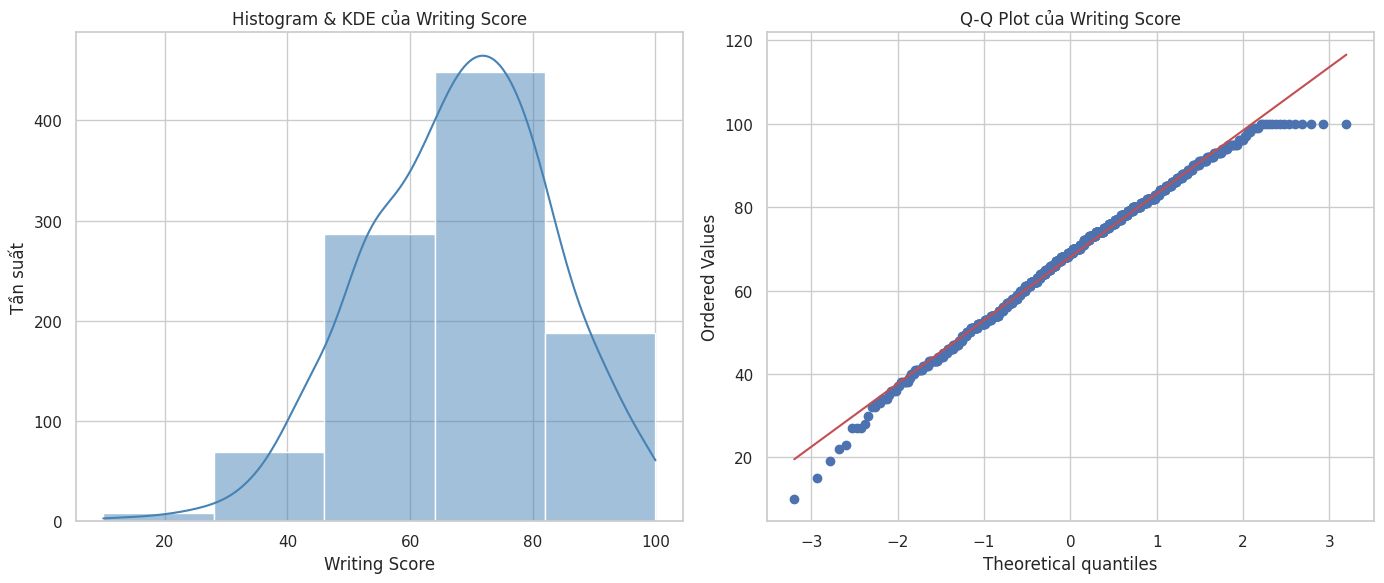

Shapiro-Wilk test cho Writing Score: Statistic=0.9920, p-value=0.00003


In [53]:
check_normality(writing_scores, "Writing Score")

**Nhận xét:** Kết quả kiểm định Shapiro-Wilk cho điểm Viết cho thấy Statistic = 0.9920 và p-value = 0.00003, nhỏ hơn mức ý nghĩa 0.05, do đó chúng ta bác bỏ giả thuyết H0 và khẳng định rằng điểm Viết không tuân theo phân phối chuẩn. Qua biểu đồ Histogram và KDE, phân bố điểm Viết có xu hướng lệch trái với phần đuôi bên trái kéo dài, điểm số chủ yếu tập trung ở khoảng 60-80 nhưng có một số học sinh đạt điểm rất thấp (<30) và rất cao (>90) với số lượng không đáng kể. Q-Q Plot cũng cho thấy dữ liệu không hoàn toàn khớp với đường chuẩn 45°, đặc biệt phần đuôi bên trái lệch xuống, củng cố thêm xu hướng lệch trái của phân phối. 

# Kiểm định giả thuyết

**Đặt giả thuyết:**

- H0(Giả thuyết không): Không có sự khác biệt đáng kể về điểm số giữa nam và nữ.
- H1(Giả thuyết đối): Có sự khác biệt đáng kể về điểm số giữa nam và nữ.

In [54]:
math_scores_male = df[df['gender'] == 'male']['math score']
math_scores_female = df[df['gender'] == 'female']['math score']

t_stat, p_value = stats.ttest_ind(math_scores_male,math_scores_female)
print(f"T_statistic: {t_stat}")
print(f"P_value: {p_value}")


T_statistic: 5.383245869828983
P_value: 9.120185549328822e-08


**Kết quả từ phân tích:**
 - t_statistic khoảng 5.38, p_value khoảng 0.0091.
 - Vì p_value ~0.0091 < 0.05, có căn cứ để bác bỏ giả thuyết H0.
   
**Kết luận bổ sung:**
- Xác suất để sự khác biệt giữa điểm Toán của nam và nữ chỉ là ngẫu nhiên là rất thấp.
- Điều này cho thấy sự khác biệt về điểm Toán giữa học sinh nam và nữ là có ý nghĩa thống kê, phản ánh rằng có yếu tố tác động thật sự khiến điểm số của hai nhóm học sinh khác nhau.


# Phân tích tương quan giữa các biến

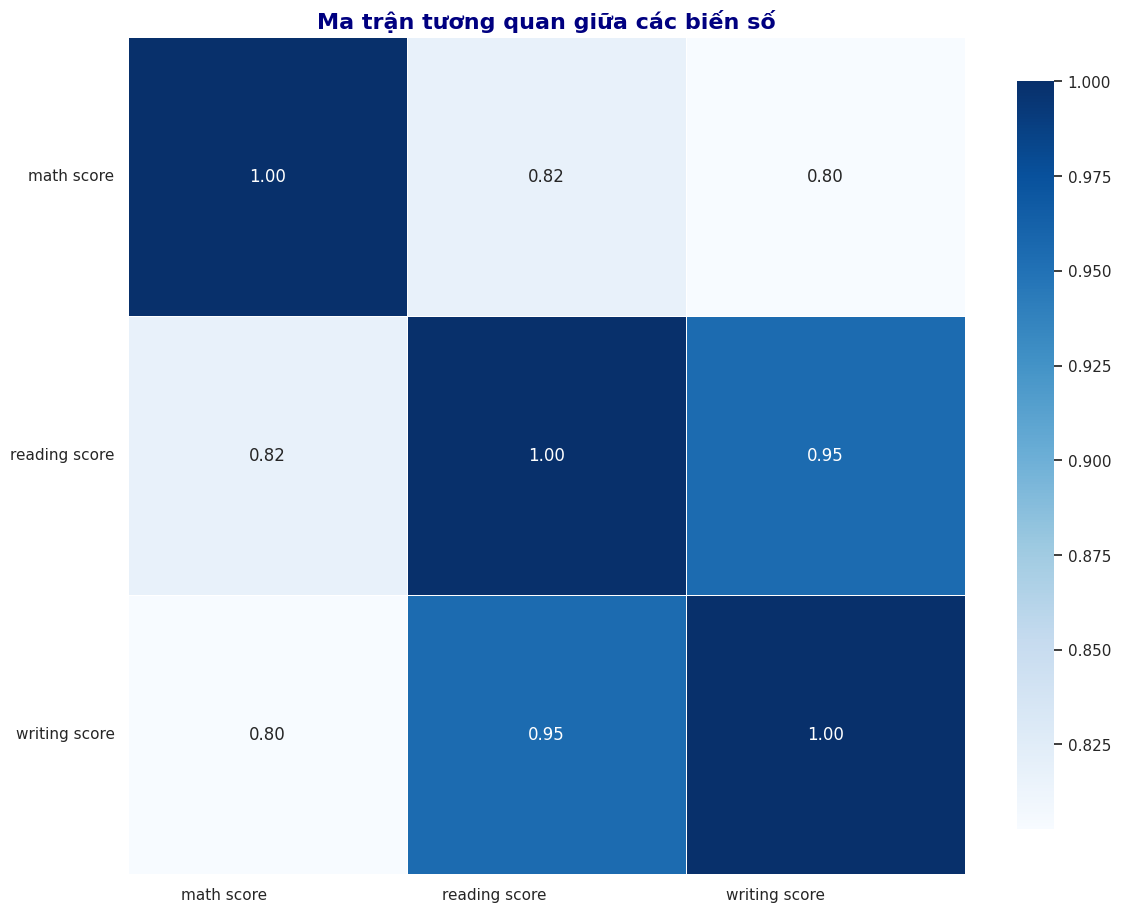

In [55]:
num_df = df[scores]
corr = num_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Blues",              
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title("Ma trận tương quan giữa các biến số", fontsize=16, color='navy', weight='bold')
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Nhận xét:** : Ma trận tương quan cho thấy rằng các biến điểm thi có mối quan hệ dương tương đối chặt chẽ với nhau. Cụ thể, điểm Toán có hệ số tương quan với điểm Đọc và Viết lần lượt là 0.82 và 0.80, cho thấy khi học sinh có điểm cao ở Toán thì thường có xu hướng đạt điểm cao ở Đọc và Viết. Đặc biệt, điểm Đọc và Viết có mối tương quan rất cao, đạt 0.95, phản ánh rằng hai kỹ năng ngôn ngữ này có tính chất gần gũi và phát triển đồng bộ.
